In [9]:
seurat = readRDS('20240306_seurat.RDS')

In [34]:
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 8),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [8]:
BCRmeta = readRDS('BCRmeta.RDS')
seurat@meta.data = BCRmeta

In [3]:
hc = readRDS('hc.RDS')

In [170]:
library(dplyr)
doub = hc  %>% group_by(LANE_ID) %>% mutate(n = n()) %>% filter(n > 0)
dim(doub)

[1] 39179    72

In [171]:
a= doub%>% group_by(LANE_ID) %>% mutate(sequse = substring(SEQUENCE_IMGT, 73, 500)) %>% summarize(nseq = length(unique(sequse)), ngene = length(unique(V_CALL)), ncdr3 = length(unique(CDR3_IMGT)))


In [4]:
cell_consensus_hc = read.table('hc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) 
cell_consensus_lc = read.table('lc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) 

In [11]:
library(dplyr)
df = rbind(cell_consensus_hc, cell_consensus_lc) %>% filter(LANE_ID %in% seurat$id[seurat$cluster_name != 'Non-B cell'])

In [29]:
a = df %>% group_by(LANE_ID, LOCUS) %>% mutate(numi = n(), nfrag = sum(str_length(SEQUENCE_TRIM)  > 250) > 0) %>% 
filter(numi > 1,  str_length(SEQUENCE_TRIM) > 250) %>% group_by(LOCUS) %>%  summarize(rel = sum(ERRORDIST < 11)/n()) 
a

LOCUS,rel
<chr>,<dbl>
IGH,0.8880810
IGK,0.9308840
IGL,0.9668062


ERROR: Error in eval(expr, envir, enclos): object 'Axis_themes' not found


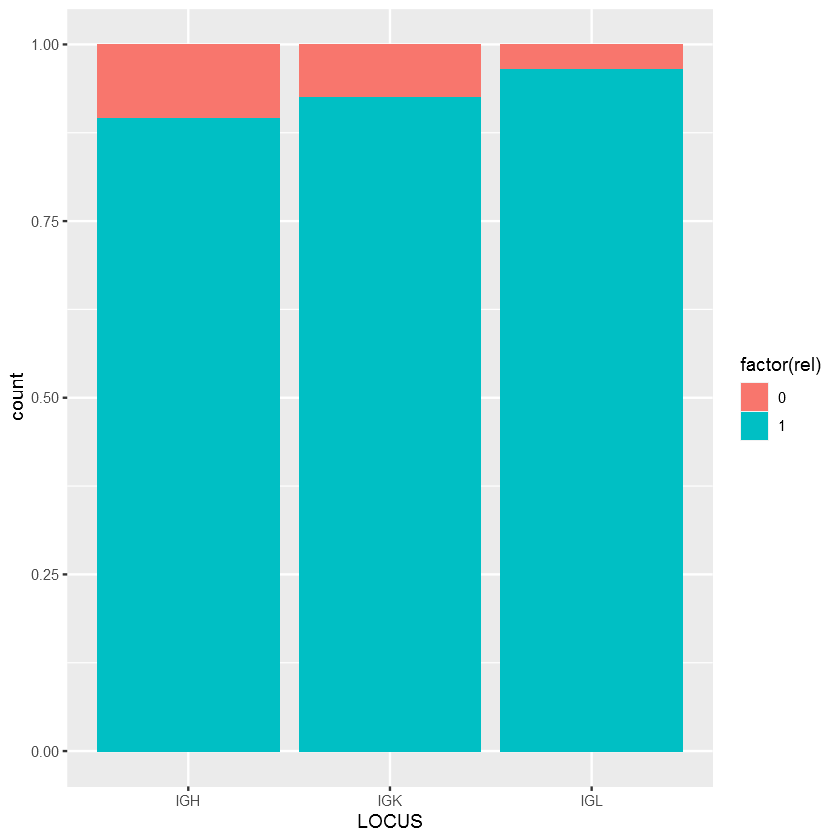

In [31]:
library(stringr)
library(ggplot2)
a = df %>% group_by(LANE_ID) %>% mutate(numi = n(), nfrag = sum(str_length(SEQUENCE_TRIM) <250) > 0) %>% filter(numi >1,  str_length(SEQUENCE_TRIM) > 250) %>% mutate(rel = as.numeric(ERRORDIST < 10)) 
#ggplot(a, aes(x = LOCUS, fill = factor(rel))) + geom_bar(position = 'fill') #+ facet_wrap('nfrag')
ggplot(a %>% filter(rel == 1), aes(x = LOCUS, fill = factor(ERRORDIST))) + geom_bar(position = 'fill') + Axis_themes

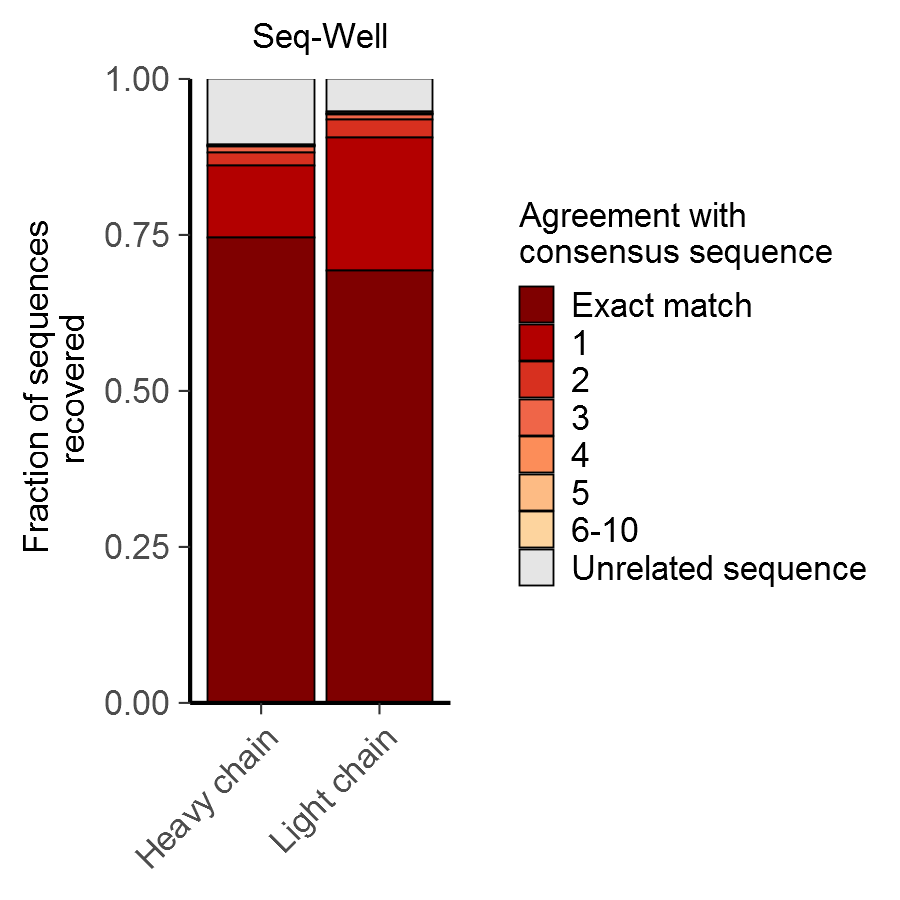

In [53]:
library(RColorBrewer)
options(repr.plot.res = 300, repr.plot.width = 3, repr.plot.height = 3)
a =  df %>% group_by(LANE_ID) %>% mutate(numi = n(), nfrag = sum(str_length(SEQUENCE_TRIM) <250) > 0) %>% filter(numi >1,  str_length(SEQUENCE_TRIM) > 250) %>% mutate(rel = as.numeric(ERRORDIST < 10)) 

a = a %>% mutate(CHAIN = ifelse(LOCUS == 'IGH', 'Heavy chain', 'Light chain'))
a$class = a$ERRORDIST
a$class[a$class > 5] = '6-10'
a$class[a$class == 0] = 'Exact match'
a$class[a$ERRORDIST > 10] = 'Unrelated sequence'
a$class = factor(a$class, levels = c('Unrelated sequence', '6-10', 5, 4, 3, 2, 1, 'Exact match'))
ggplot(a, aes(x = CHAIN, fill = class)) + geom_bar(position = 'fill', color = 'black', size = .155) + 
scale_fill_manual(values = (c(brewer.pal(9,'OrRd')[c(9,8,7,6,5,4,3)], 'grey90')), limits = rev(levels(a$class))) + theme_classic() +Axis_themes + labs(x = c(), y = 'Fraction of sequences\nrecovered') + scale_y_continuous(expand = c(0,0)) + 
labs(fill = 'Agreement with\nconsensus sequence') + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.key.size = unit(3, 'mm')) + 
ggtitle('Seq-Well') + theme(plot.title = element_text(hjust = .5))

ggsave('Figures/sqacc.pdf', height = 2, width = 2.8)

In [2]:
other = readRDS('../JZ_figures/10xplt.RDS')